In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Boston Dataset

In [6]:
dataset = pd.read_csv('/content/boston_housing.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
dataset.rename(columns={'MEDV':'Price'}, inplace=True)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [11]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [12]:
dataset.dropna(inplace=True)

# Correlation

In [9]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


* If the correlation is close to +1 or -1 then it means that the two
features are not providing any value in the prediction because they have similar effect.

* It's best to have collinearity near to 0 as the features would be completely different

# Visualizations

Text(0, 0.5, 'Price')

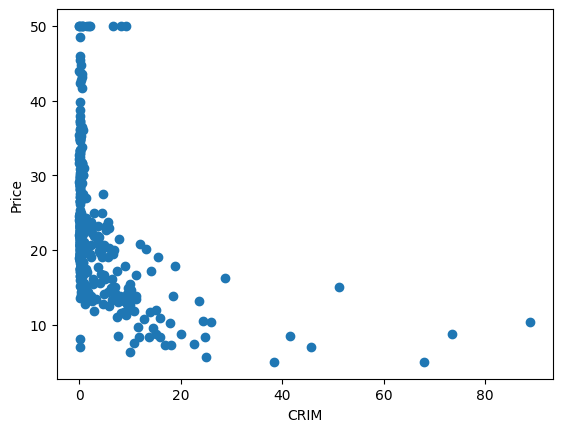

In [14]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('CRIM')
plt.ylabel('Price')

As crime increases price drops.

Text(0, 0.5, 'Price')

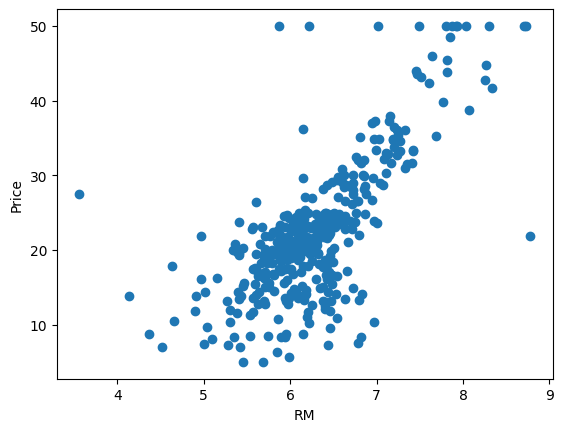

In [16]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

As room increases price increases

<Axes: xlabel='RM', ylabel='Price'>

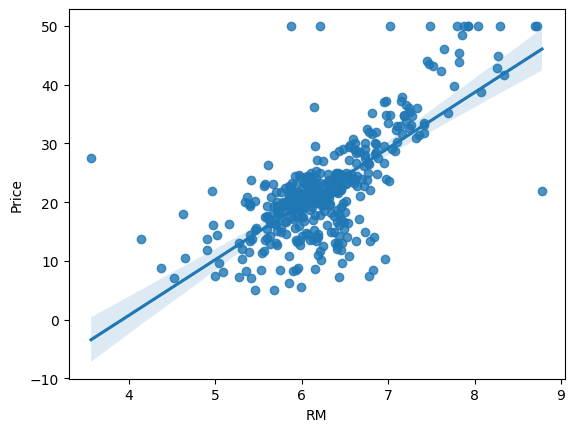

In [17]:
import seaborn as sns
sns.regplot(x='RM', y='Price', data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

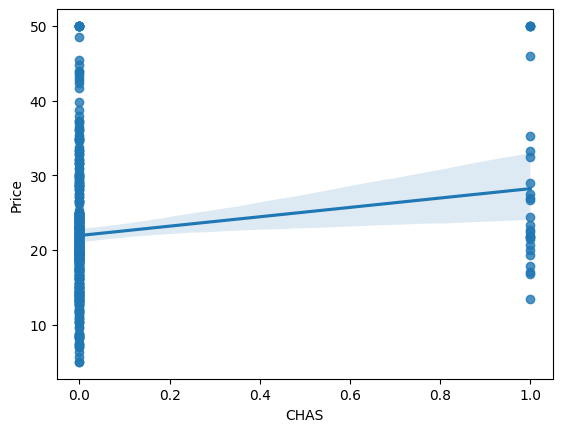

In [18]:
sns.regplot(x='CHAS', y='Price', data=dataset)

# PRE processing

In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scaling brings all the features in same unit and it helps gradient descent in converging.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* fit_transform builds the scaling technique and once built.
* transform simply mimics it.
* Hence we just use fit_transform once and after learning the scaling we apply it blindly.

# Model training

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

By doing this we create a hyperplane on X_train and y_train which makes a linear regression line.

In [23]:
print(regressor.intercept_)

22.33600000000001


In [24]:
print(regressor.coef_)

[-0.72440111  1.13086049  0.16867878  0.88086499 -2.27198603  3.52126417
 -0.82218845 -3.3191453   2.04199641 -2.07416946 -1.9414968   0.83749946
 -2.5081913 ]


In [26]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [27]:
reg_pred = regressor.predict(X_test)

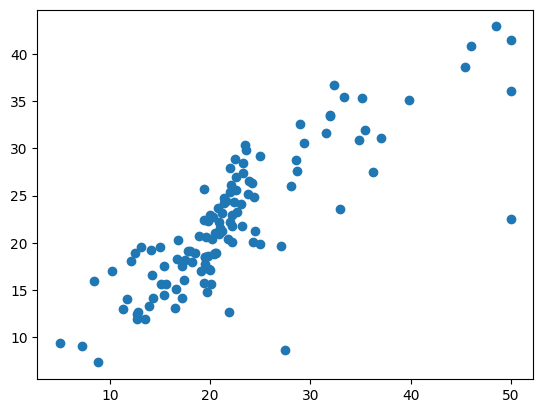

In [28]:
plt.scatter(y_test, reg_pred)

As the prediction is normal it means that our model has performed well.

In [29]:
residuals = y_test - reg_pred

Residuals is the distance between prediction and actual values.

<ipython-input-30-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

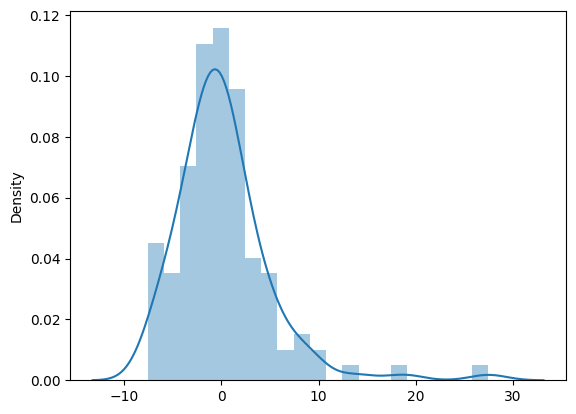

In [30]:
sns.distplot(residuals)

We should get a normal plot of residuals. It means that our model is predicting values closer to actual values.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'MSE - {mean_squared_error(y_test, reg_pred)}')
print(f'MAE - {mean_absolute_error(y_test, reg_pred)}')
print(f'RMSE - {mean_squared_error(y_test, reg_pred)**(1/2)}')

MSE - 23.88452266359334
MAE - 3.2710371885085956
RMSE - 4.887179417986753


In [38]:
from sklearn.metrics import r2_score
print(f'R2 Score - {r2_score(y_test, reg_pred)}')

R2 Score - 0.6873411644615657


# Pickle the model for deployment

In [39]:
import pickle

In [40]:
pickle.dump(regressor, open('linregmodel.pkl', 'wb'))

We have to store this model in write byte mode for the given path.

In [41]:
pickled_model = pickle.load(open('linregmodel.pkl', 'rb'))

When we load the pickle file, we do it in read mode as we don't want to change it.

In [42]:
pickled_model.predict(X_test)

array([16.02014897, 19.8786145 , 26.51655953, 41.55063799, 16.55982967,
       18.47726075, 28.72772643, 19.18189203, 28.41618661, 12.62781976,
       23.63025232, 14.75283979, 22.51882025, 25.38583201, 11.91321675,
       32.62806035, 27.52669354, 29.80343961, 25.18137589, 24.84585359,
       18.2815523 , 31.16276103, 20.93213088, 18.89590473, 18.89636369,
       23.18138028, 17.01858916,  9.40480637, 23.30544875, 23.73480932,
        8.67844375, 22.23695138, 18.86504307, 26.94051835, 15.62089084,
       14.15565601, 22.90865673, 18.16449343, 22.69713891, 13.1285298 ,
       24.45702888, 12.96727111, 29.22904169, 21.80060237, 33.59967057,
       14.42296503, 19.12540005, 17.08419535, 12.61256312, 14.15835498,
       20.06204569, 18.82848665, 12.48695337, 31.92103963,  7.30296475,
       17.02061099, 18.57190745, 18.9158022 , 21.26549375, 26.3659792 ,
       17.91185735, 18.03767546, 21.73187005, 19.63284617, 21.29438092,
       40.87167846, 19.59199498, 30.59881489, 15.62699723, 30.87

This is probaly same as the y_pred